In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
ndata=pd.read_csv("C:/Users/User/Downloads/of.csv")

   The following are the features
   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

In [199]:
ndata.head(10)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [5]:

ndata.loc[ndata['area']==0.0,'fire']=0
ndata['fire'].fillna(1,inplace=True)
ndata.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire
0,7,5,7,0,28,37,41,29,12,34,14,0,0,0.0
1,7,4,10,5,56,49,144,42,85,16,1,0,0,0.0
2,7,4,10,2,56,56,156,42,55,16,2,0,0,0.0
3,8,6,7,0,67,48,33,64,13,72,8,1,0,0.0
4,8,6,7,3,46,66,46,68,30,73,3,0,0,0.0


In [201]:
ndata.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
fire     False
dtype: bool

#### There are no missing values

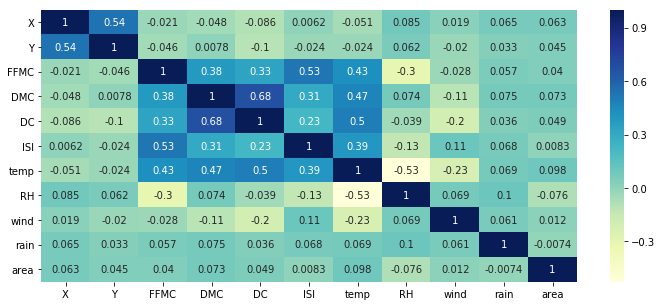

In [6]:
fig, ax = plt.subplots(figsize=(12,5))

sns.heatmap(ndata.corr(),annot = True,cmap="YlGnBu");

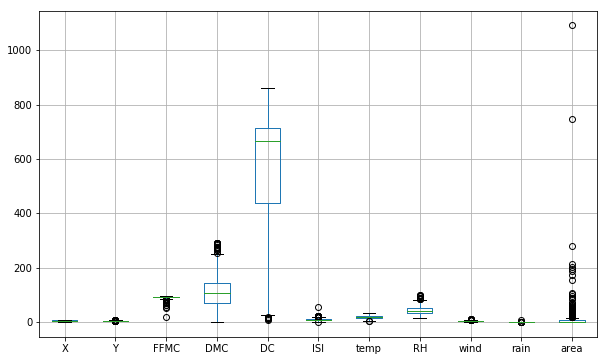

In [60]:
plt.figure(figsize=(10,6))
ndata.boxplot()


In [5]:
ndata.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [38]:
forest=ndata[ndata.area>0.0]
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,place
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,"9,9"
139,1,4,sep,tue,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,0.43,"1,4"
140,2,5,sep,mon,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,0.47,"2,5"
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55,"1,2"
142,8,6,aug,fri,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,"8,6"


In [39]:
month=forest[['FFMC','DC','ISI','temp','RH','month']].groupby('month').size().reset_index(name='counts')
month=pd.DataFrame(month)
month

,month,counts
0,apr,4
1,aug,99
2,dec,9
3,feb,10
4,jul,18
5,jun,8
6,mar,19
7,may,1
8,oct,5
9,sep,97


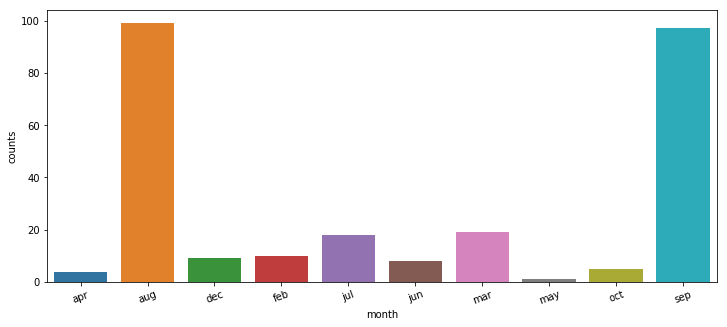

In [40]:
#The months in which the forest fires occur frequently
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'month', y = 'counts', data = month)
plt.xticks(rotation=20);

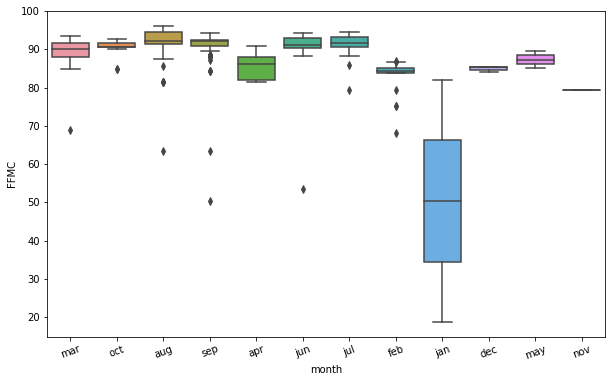

In [41]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='FFMC', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

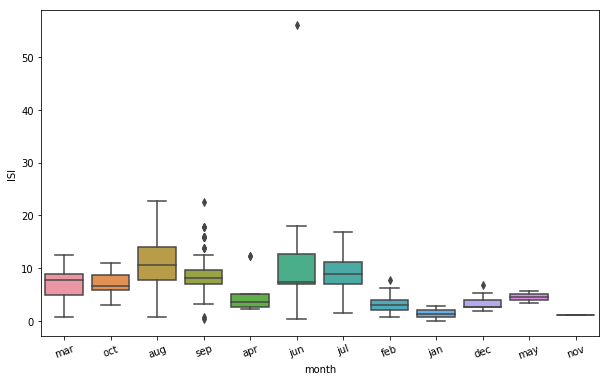

In [42]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='ISI', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

### August and September are the 2 months where the forest fires occur frequently 

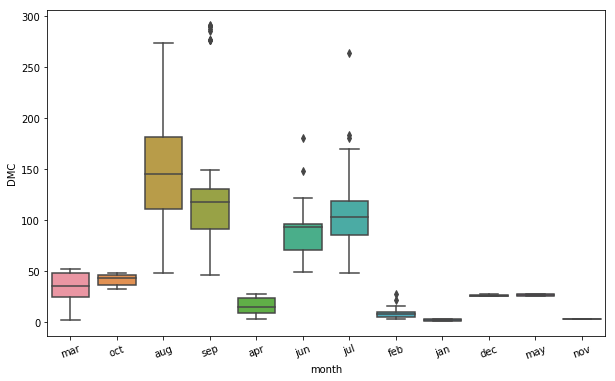

In [43]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='DMC', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

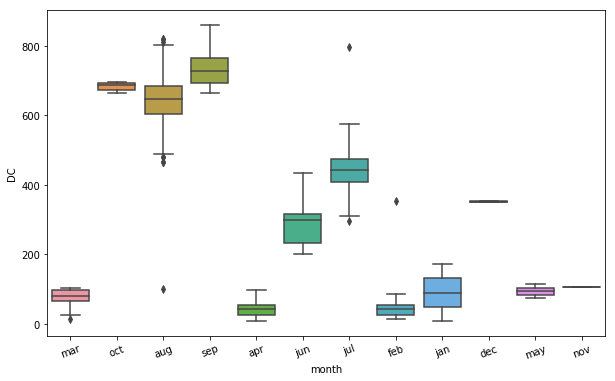

In [44]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='DC', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

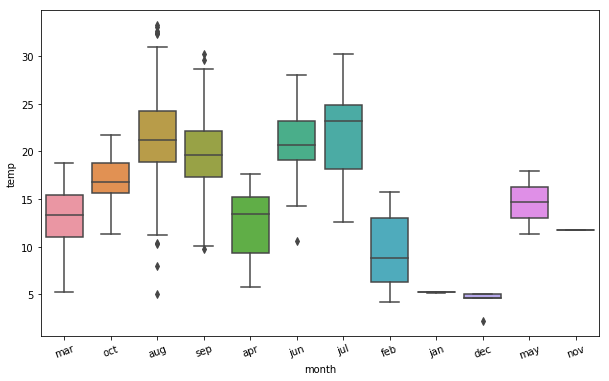

In [45]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='temp', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

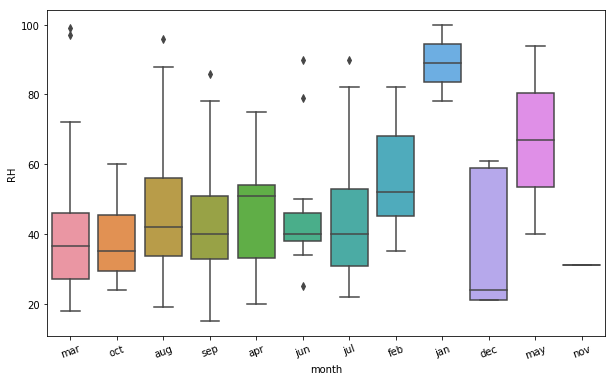

In [46]:
plt.figure(figsize=(10,6))
g = sns.boxplot(y='RH', x='month', data = ndata)
g.set_xticklabels(g.get_xticklabels(),rotation=20);

In [47]:
place=forest[['FFMC','DC','ISI','temp','RH','place']].groupby('place').size().reset_index(name='counts')
place=pd.DataFrame(place)
place.head()

,place,counts
0,"1,2",4
1,"1,3",7
2,"1,4",10
3,"1,5",4
4,"2,2",11


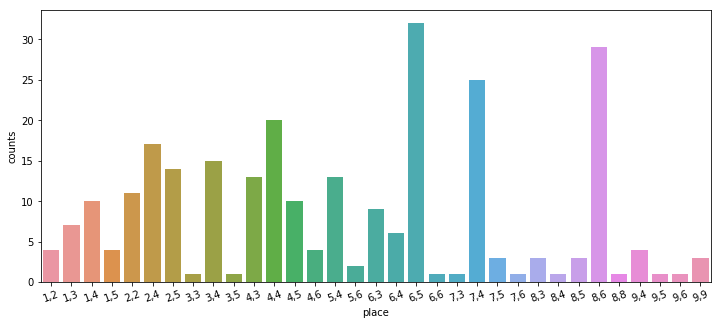

In [48]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'place', y = 'counts', data = place)
plt.xticks(rotation=20);

### As you can see at the place (6,5) the forest fire has occured more frequently than the rest

In [77]:
ndata=pd.read_csv("C:/Users/User/Downloads/of.csv")

In [36]:
ndata["FFMC"] = np.where((ndata["FFMC"]-ndata.FFMC.median()).abs()>(ndata.FFMC.std()),ndata.FFMC.mean(),ndata['FFMC'])

In [37]:
ndata["DMC"] = np.where((ndata["DMC"]-ndata.DMC.mean()).abs()>2*(ndata.DMC.std()),ndata.DMC.mean(),ndata['DMC'])

In [38]:
ndata["DC"] = np.where((ndata["DC"]-ndata.DC.mean()).abs()>1*(ndata.DC.std()),ndata.DC.mean(),ndata['DC'])

In [39]:
ndata["RH"] = np.where((ndata["RH"]-ndata.RH.median()).abs()>(ndata.RH.std()),ndata.RH.median(),ndata['RH'])

In [448]:
ndata["area"] = np.where((ndata["area"]-ndata.area.median()).abs()>0.2*(ndata.area.std()),ndata.area.median(),ndata['area'])

In [47]:
ndata.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,5.758221,2.736944,63.599613,120.056093,126.324952,59.232108,95.764023,27.206963,7.990329,0.048356,63.419729,0.522244
std,2.313778,1.229900,4.373275,1.925061,23.103161,56.299197,59.651888,27.786846,47.060352,15.889081,3.991015,0.439765,80.258931,0.499989
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.000000,1.000000,1.000000,52.000000,75.000000,81.000000,40.000000,62.000000,16.000000,5.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,3.000000,66.000000,127.000000,138.000000,58.000000,98.000000,25.000000,8.000000,0.000000,10.000000,1.000000
75%,7.000000,5.000000,11.000000,4.000000,79.000000,166.000000,174.000000,77.000000,131.000000,36.000000,10.000000,0.000000,125.000000,1.000000
max,9.000000,9.000000,11.000000,6.000000,105.000000,214.000000,218.000000,118.000000,191.000000,74.000000,20.000000,6.000000,250.000000,1.000000


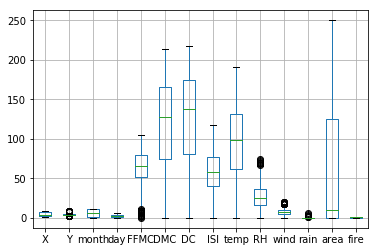

In [48]:
ndata.boxplot()

In [6]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
colu=['month','day']
for col in colu:
    ndata[col] = le.fit_transform(ndata[col])
from sklearn.preprocessing import scale
colu=['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','fire']

for col in colu:
    ndata[col] = le.fit_transform(ndata[col])

In [7]:
ndata.head(10)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire
0,7,5,7,0,28,37,41,29,12,34,14,0,0,0
1,7,4,10,5,56,49,144,42,85,16,1,0,0,0
2,7,4,10,2,56,56,156,42,55,16,2,0,0,0
3,8,6,7,0,67,48,33,64,13,72,8,1,0,0
4,8,6,7,3,46,66,46,68,30,73,3,0,0,0
5,8,6,1,3,73,93,91,102,125,12,11,0,0,0
6,8,6,1,1,73,98,92,59,144,10,6,0,0,0
7,8,6,1,1,65,167,118,76,11,66,4,0,0,0
8,8,6,11,5,60,149,161,44,42,46,11,0,0,0
9,7,5,11,2,75,95,164,45,131,23,8,0,0,0


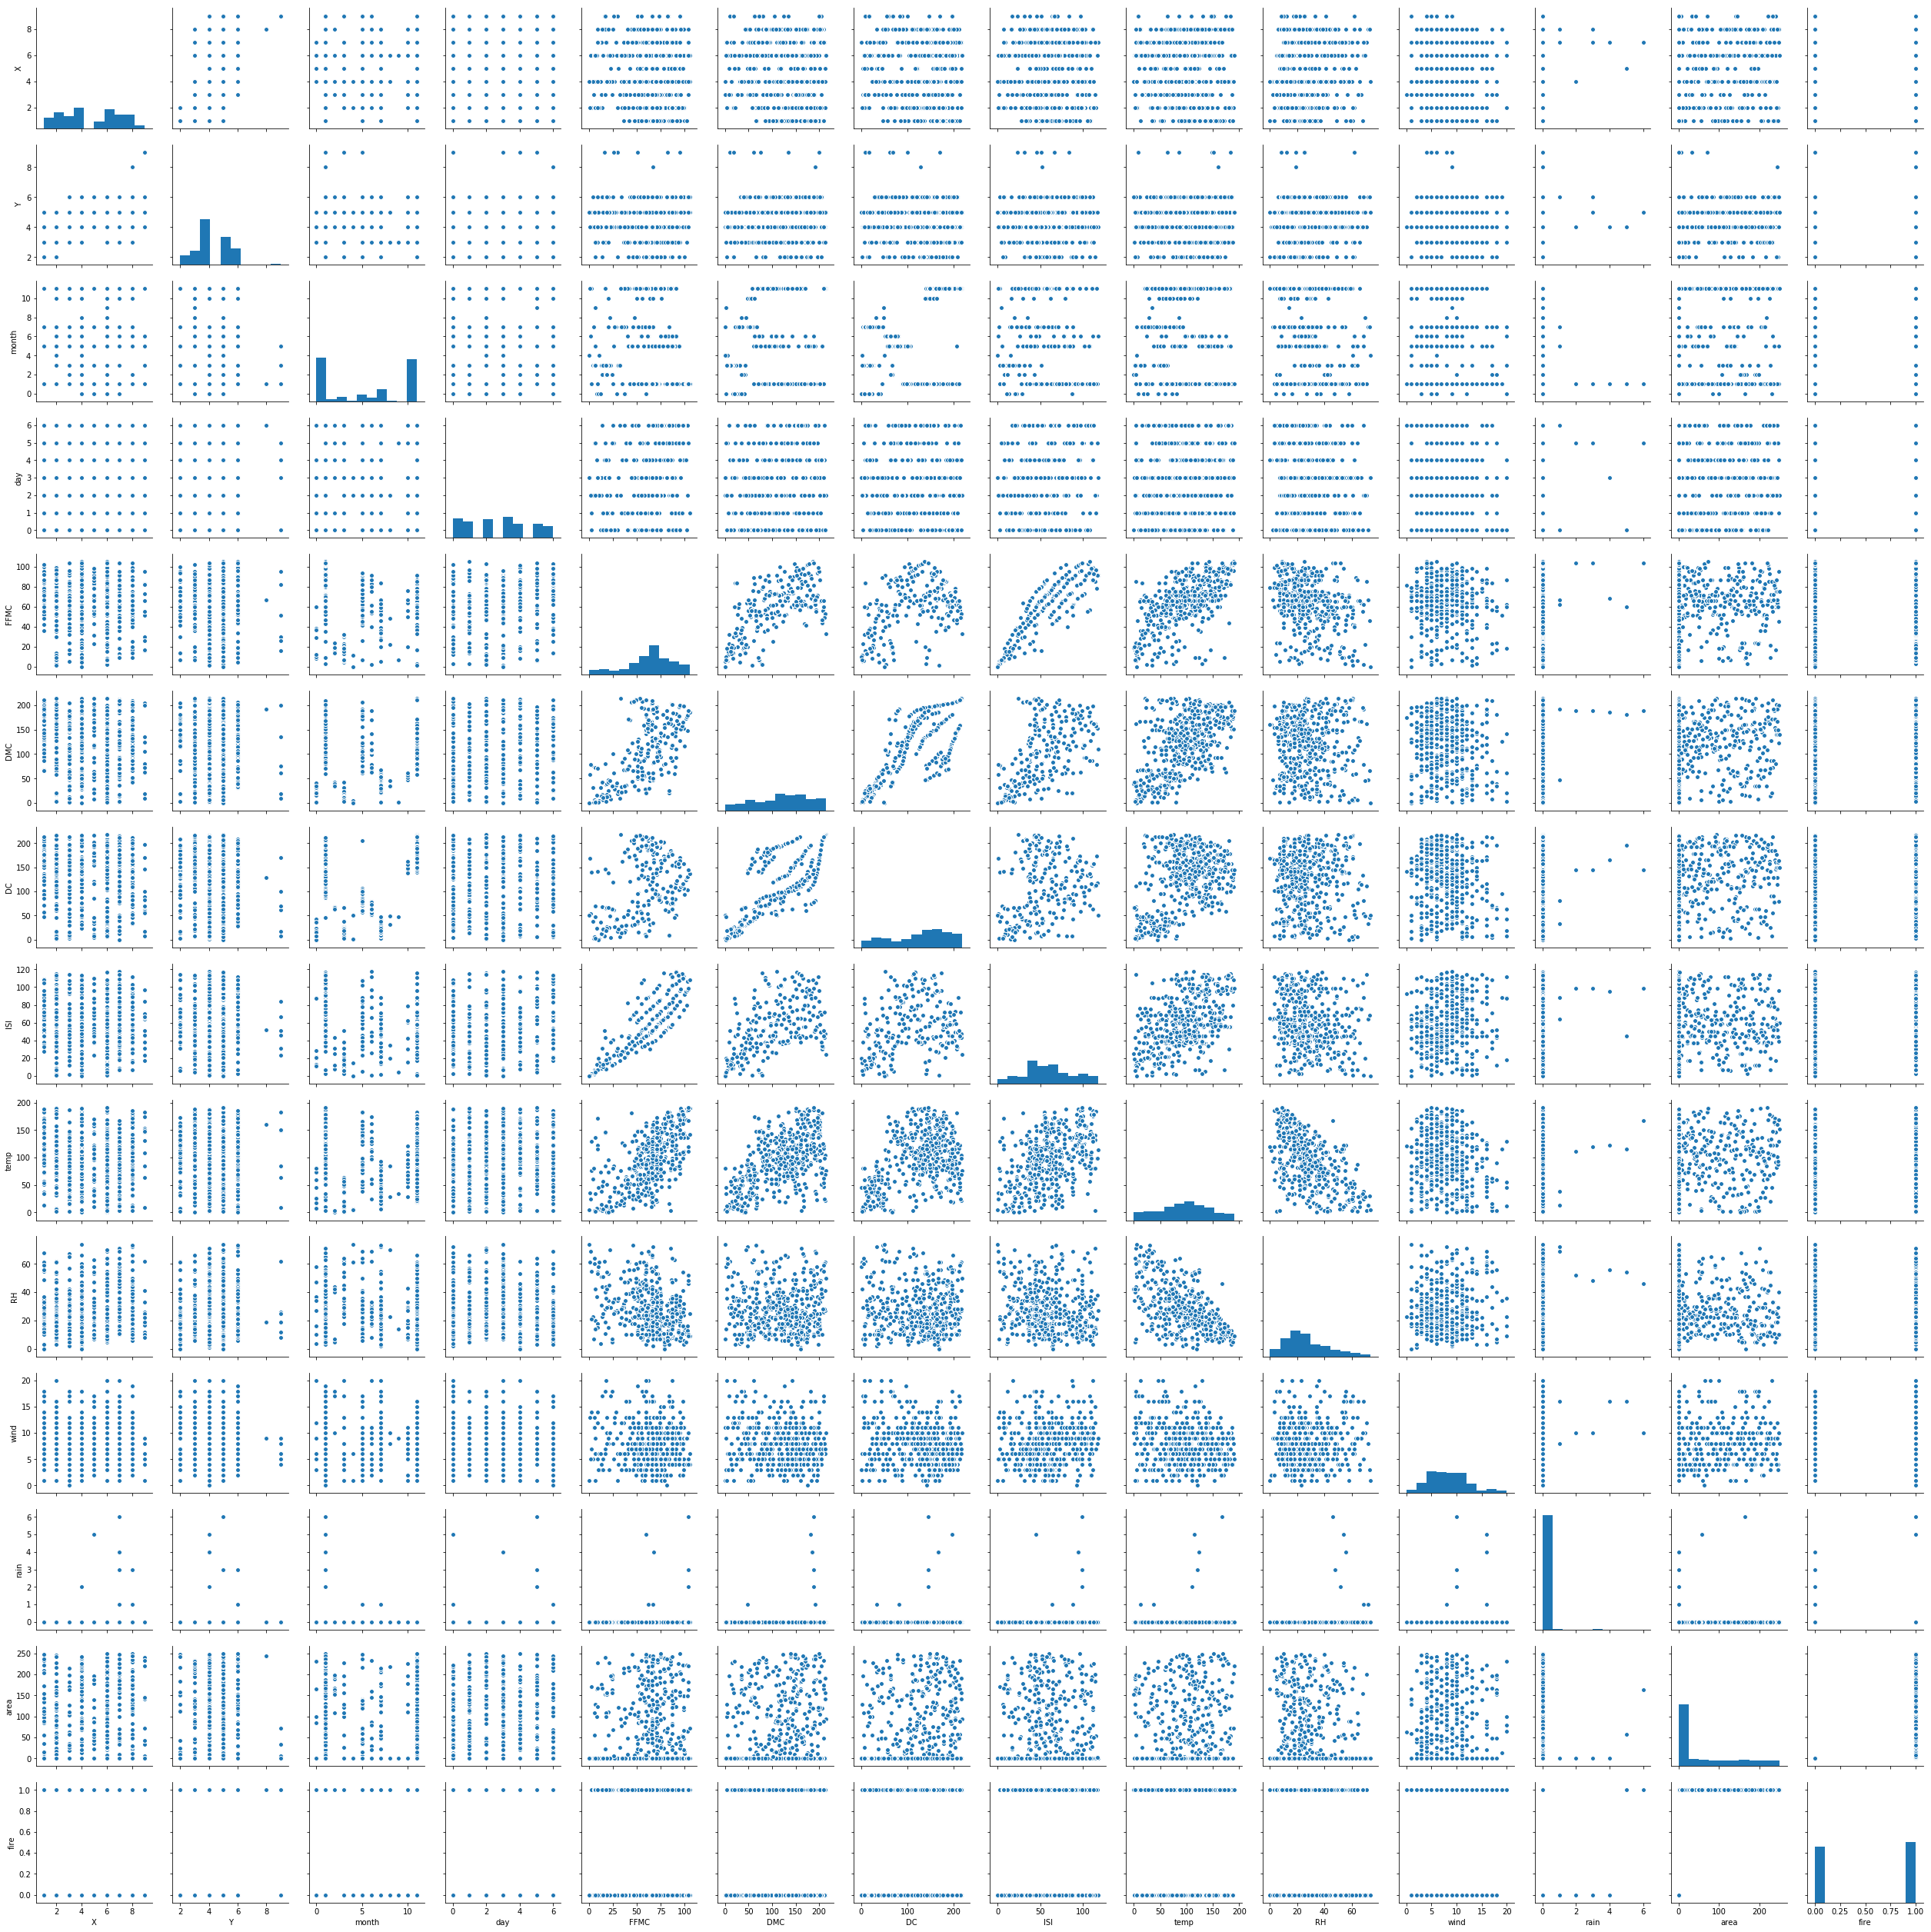

In [177]:
sns.pairplot(ndata)

In [212]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(ndata))
ndata = ndata[(z < 3).all(axis=1)]


In [14]:
X = ndata.iloc[:, [2,4,5,6,7,8,9,10,11]].values
y = ndata.iloc[:, 13].values
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 


In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,oob_score=True ,random_state =42, min_samples_split=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='weighted')


0.5880529726683574

In [16]:
from sklearn.svm import SVC

clf = SVC(random_state = 100, kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='weighted')

0.6140649285902812

In [17]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.00001)
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='weighted')

0.6547588005215125

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predictions = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='weighted')


0.6547588005215125

In [19]:
n_neighbors = np.arange(3, 13, 1)
n_neighbors
accuracies = []
for n in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    accuracy = f1_score(y_test,y_pred,average='weighted')
    accuracies.append(accuracy)
accuracies


[0.6547588005215125,
 0.6547588005215125,
 0.6547588005215125,
 0.6547588005215125,
 0.6547588005215125,
 0.6547588005215125,
 0.6547588005215125,
 0.6547588005215125,
 0.6547588005215125,
 0.6547588005215125]

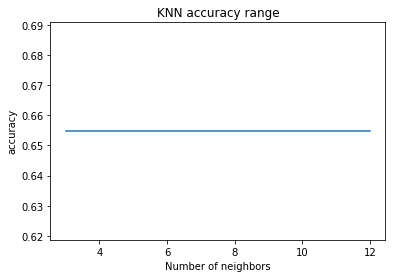

In [223]:
plt.title('KNN accuracy range')
plt.xlabel('Number of neighbors')
plt.ylabel('accuracy')
plt.plot(n_neighbors, accuracies)
plt.show()

### As you can see Logistic regression gives the best accuracy along with Knn having 7-9 neighbours

In [211]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
log=LogisticRegression(penalty='l2',C=.00001)
log.fit(X_train,y_train)
y_pred = log.predict(X_test1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test1, y_pred)
accuracy

0.5060240963855421

### This shows that the given data set has a lot of bias and hence the model is underfitting and the no. of samples is just 517

Perform cross validation

In [94]:
from sklearn.model_selection import KFold
kfold = KFold(3, True, 1)

In [95]:

for train, test in kfold.split(X):
    print('train: %s, test: %s' % (X[train],X[test]))
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    

train: [[  7  28  37 ...  34  14   0]
 [ 10  56  49 ...  16   1   0]
 [ 10  56  56 ...  16   2   0]
 ...
 [  1   9  71 ...  54  12   0]
 [  1  92 168 ...  25   8   0]
 [  9   7   2 ...  14   9   0]], test: [[  7  46  66 ...  73   3   0]
 [  1  73  93 ...  12  11   0]
 [  1  73  98 ...  10   6   0]
 ...
 [  1  60 181 ...  54  16   5]
 [  1   9  71 ...  15   5   0]
 [  1   9  71 ...  53  14   0]]
train: [[10 56 49 ... 16  1  0]
 [10 56 56 ... 16  2  0]
 [ 7 67 48 ... 72  8  1]
 ...
 [ 1  9 71 ... 18  5  0]
 [ 1  9 71 ... 15  5  0]
 [ 1  9 71 ... 53 14  0]], test: [[  7  28  37 ...  34  14   0]
 [ 11  60 149 ...  46  11   0]
 [ 11  75  95 ...  23   8   0]
 ...
 [  1   9  71 ...  54  12   0]
 [  1  92 168 ...  25   8   0]
 [  9   7   2 ...  14   9   0]]
train: [[  7  28  37 ...  34  14   0]
 [  7  46  66 ...  73   3   0]
 [  1  73  93 ...  12  11   0]
 ...
 [  1   9  71 ...  53  14   0]
 [  1  92 168 ...  25   8   0]
 [  9   7   2 ...  14   9   0]], test: [[ 10  56  49 ...  16   1   0]
 [ 

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.5232558139534884

In [97]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1 = sqrt(mean_squared_error(y_test, y_pred))
rmse1


0.5490390359975287

In [98]:
ndata.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,place,fire
0,7,5,7,0,28,37,41,29,12,34,14,0,0,"7,5",0
1,7,4,10,5,56,49,144,42,85,16,1,0,0,"7,4",0
2,7,4,10,2,56,56,156,42,55,16,2,0,0,"7,4",0
3,8,6,7,0,67,48,33,64,13,72,8,1,0,"8,6",0
4,8,6,7,3,46,66,46,68,30,73,3,0,0,"8,6",0
